# Analytics of SD:AAH playtraces - 1k playtraces

In [1]:
from collections import Counter
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'social_democracy/random_test_outputs_2/'

In [3]:
all_qualities = {}
all_scene_counts = {}

quality_files = {}
scene_counts_files = {}
file_is_loop = {}
for fn in os.listdir(data_path):
    if 'scenes' in fn:
        try:
            scenes_data = np.loadtxt(data_path+fn, dtype=str)
        except:
            continue
        scenes_counter = Counter(scenes_data)
        scene_counts_files[fn.split('.')[0]] = scenes_counter
        for scene, count in scenes_counter.items():
            if scene in all_scene_counts:
                all_scene_counts[scene].append(count)
            else:
                all_scene_counts[scene] = [count]
        # TODO: loop check
        is_loop = True
        prev_scene = scenes_data[-20]
        for scene in scenes_data[-20:]:
            if scene != prev_scene:
                is_loop = False
                break
        file_is_loop[fn.split('.')[0]] = is_loop
    else:
        #try:
        with open(data_path + fn) as f:
            json_data = json.load(f)
        #except:
        #    continue
        for k, v in json_data['qualities'].items():
            if k in all_qualities:
                all_qualities[k].append(v)
            else:
                all_qualities[k] = [v]
        quality_files[fn.split('.')[0]] = json_data['qualities']

In [4]:
n_runs = len(scene_counts_files)
n_qualities = len(quality_files)

In [5]:
for k, v in all_qualities.items():
    if len(v) < n_qualities:
        v += [0]*(n_qualities - len(v))
for k, v in all_scene_counts.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))

In [6]:
qualities_df = pd.DataFrame(quality_files).T
scenes_df = pd.DataFrame(scene_counts_files).T

In [7]:
scenes_df.to_csv('sd_scene_counts.csv')
qualities_df.to_csv('sd_qualities.csv')

In [8]:
scene_averages = Counter({k: np.mean(v) for k, v in all_scene_counts.items()})


In [9]:
scene_averages.most_common()[-1]

('presidential_election_1932.round2_thalmann', 0.001)

In [10]:
all_qualities.keys()

dict_keys(['started', 'time', 'year', 'month', 'month_actions', 'difficulty', 'old_demographics', 'resources', 'dues', 'dissent', 'dissent_percent', 'factions', 'left_strength', 'left_dissent', 'center_strength', 'center_dissent', 'labor_strength', 'labor_dissent', 'reformist_strength', 'reformist_dissent', 'neorevisionist_strength', 'neorevisionist_dissent', 'unions_independent', 'center_resigned', 'left_split', 'reformists_resigned', 'neorevisionism', 'crisis_urgency', 'nazi_urgency', 'radicalization', 'wtb_support', 'pacifism', 'democratization', 'communist_coalition', 'economic_plan', 'wtb_adopted', 'iron_front_formed', 'peoples_party_support', 'nationalization_support', 'nationalization_adopted', 'z_relation', 'kpd_relation', 'ddp_relation', 'dvp_relation', 'DNVP_relation', 'NSDAP_relation', 'kpd_leader', 'z_leader', 'hindenburg_relation', 'spd_prussia', 'prussian_government', 'rb_strength', 'rb_militancy', 'women_in_rb', 'rb_banned', 'sh_strength', 'sh_militancy', 'sh_banned', 's

In [11]:
victories = sum(all_qualities['achievement_einigkeit']) + sum(all_qualities['achievement_einigkeit_und_recht']) + sum(all_qualities['achievement_einigkeit_und_recht_und_freiheit'])

In [12]:
defeats = sum(all_qualities['achievement_stolperstein'])

In [13]:
total_defeat_count = sum(1 for k, qs in quality_files.items() if 'achievement_stolperstein' in qs or qs['chancellor'] == 'Hitler' or qs['president'] == 'Hitler')

In [14]:
civil_war_count = sum(1 for k, qs in quality_files.items() if 'long_civil_war' in qs)

In [15]:
total_defeat_count

976

In [16]:
victories

7

In [17]:
sum(all_qualities['achievement_einigkeit_und_recht_und_freiheit'])

1

In [18]:
sum(all_qualities['achievement_constitutional_coalition'])

21

In [19]:
sum(all_qualities['achievement_wirtschaftspolitik'])

5

In [20]:
sum(all_qualities['achievement_volkspartei'])

22

In [21]:
sum(all_qualities['achievement_eiserne_front'])

104

In [22]:
sum(all_qualities['total_defeat'])

255

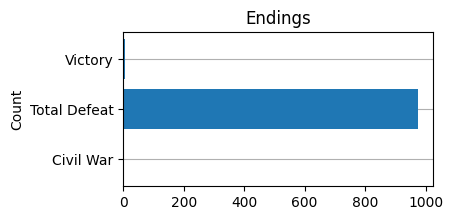

In [23]:
plt.subplots(figsize=(4, 2))

plt.barh(['Civil War', 'Total Defeat', 'Victory'], [civil_war_count, total_defeat_count, victories], align='center')
#plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Endings')
plt.ylabel('Count')
plt.show()

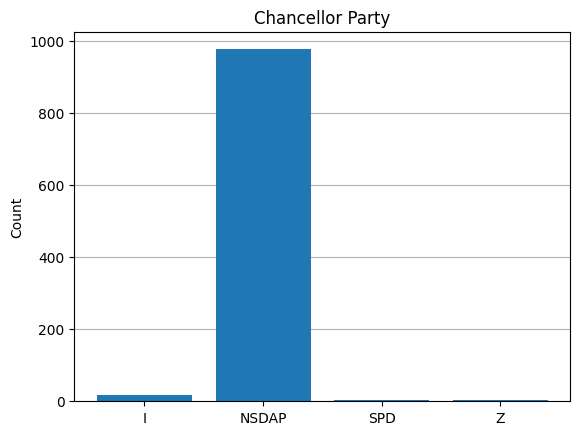

In [25]:
labels, counts = np.unique(all_qualities['chancellor_party'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Chancellor Party')
plt.ylabel('Count')
plt.show()

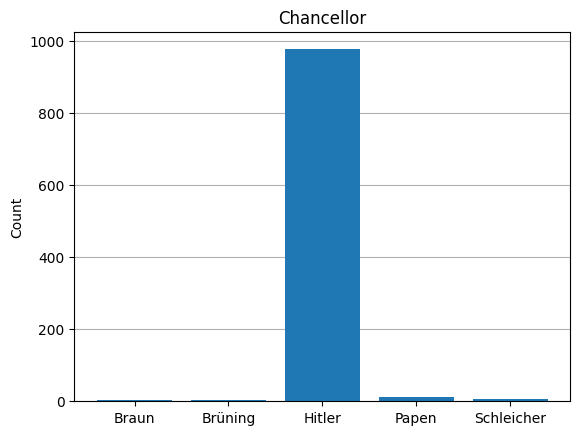

In [26]:
labels, counts = np.unique(all_qualities['chancellor'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Chancellor')
plt.ylabel('Count')
plt.show()

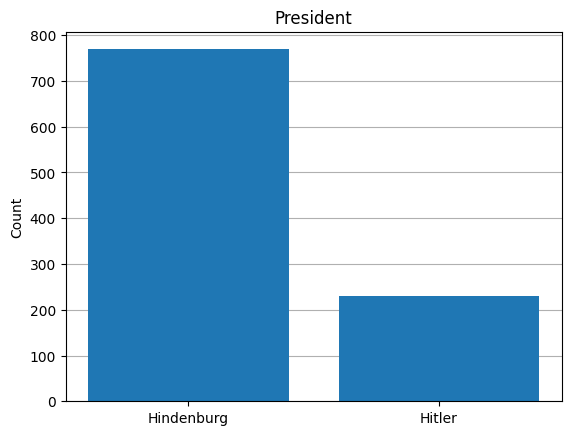

In [27]:
labels, counts = np.unique(all_qualities['president'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('President')
plt.ylabel('Count')
plt.show()

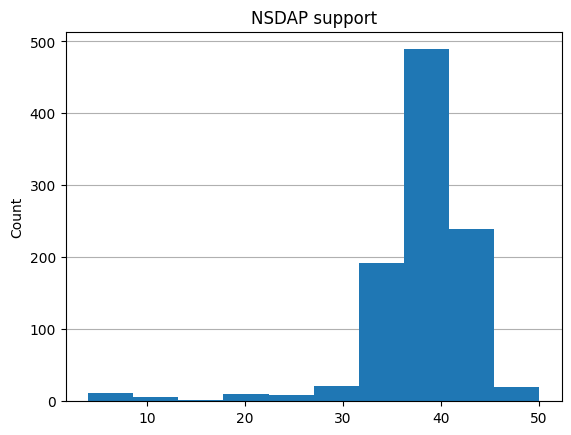

In [28]:
plt.hist(all_qualities['nsdap_r'])
plt.title('NSDAP support')
plt.ylabel('Count')
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.show()

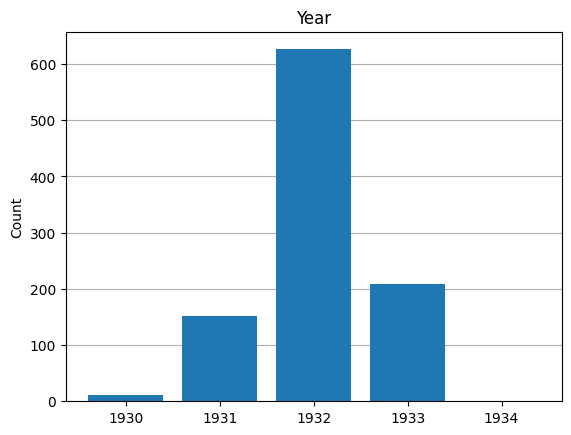

In [29]:
labels, counts = np.unique(all_qualities['year'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Year')
plt.ylabel('Count')
plt.show()

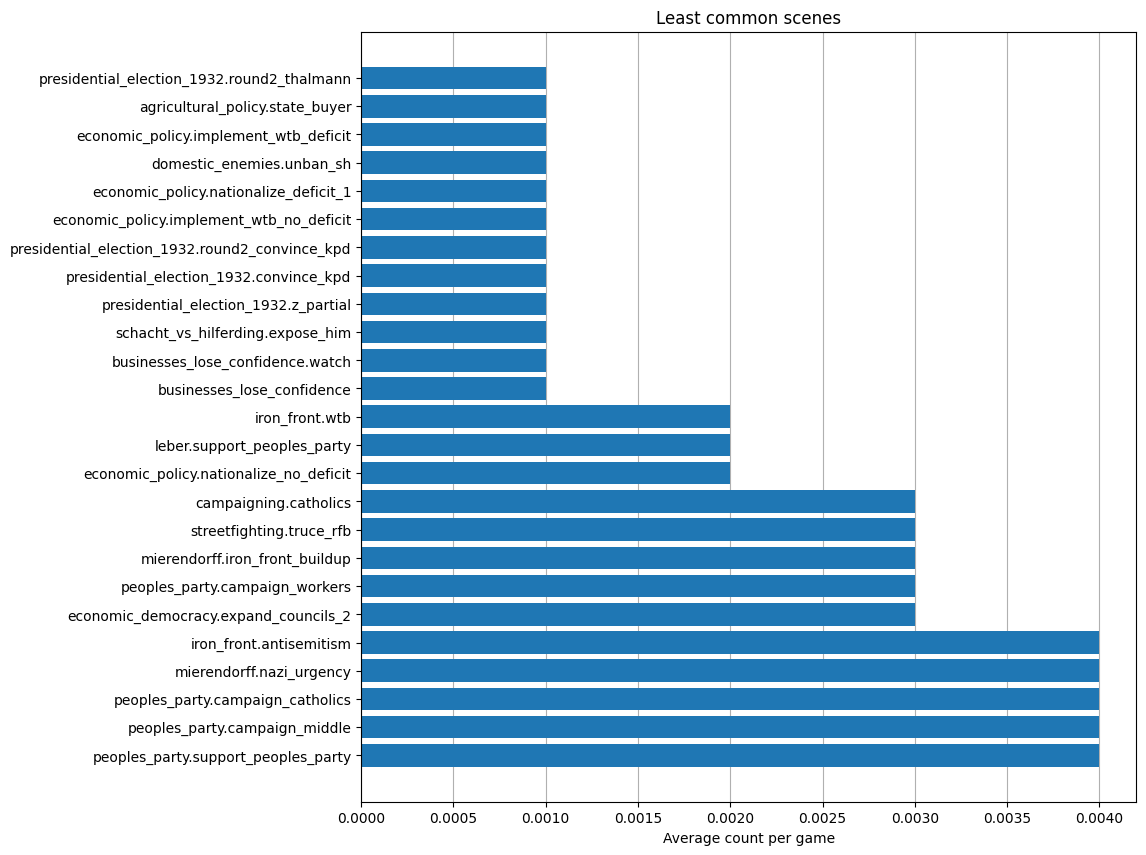

In [30]:
least_common = Counter(scene_averages).most_common()[-25:]
plt.subplots(figsize=(10, 10))
plt.grid(axis='x', zorder=0)
plt.gca().set_axisbelow(True)
plt.barh([x[0] for x in least_common], [x[1] for x in least_common])
plt.xlabel('Average count per game')
plt.title('Least common scenes')
plt.show()

In [31]:
loop_scenes = [s for s, k in file_is_loop.items() if k]

In [32]:
len(loop_scenes)

3

In [33]:
loop_scenes

['scenes_892', 'scenes_433', 'scenes_710']

In [36]:
scenes_data = np.loadtxt(data_path+'scenes_892.txt', dtype=str)

In [37]:
scenes_data

array(['root.start_menu_2', 'root.start', 'main', 'muller', 'main',
       'wels', 'wels.clear_agenda', 'main', 'wels', 'main', 'main.party',
       'fundraising', 'fundraising.increase', 'main', 'wels', 'main',
       'muller', 'main', 'wels', 'main', 'hilferding', 'main', 'muller',
       'main', 'hilferding', 'main', 'wels', 'main', 'wels', 'main',
       'wels', 'main', 'wels', 'main', 'main.party', 'reichsbanner',
       'reichsbanner.same', 'main', 'muller', 'main', 'hilferding',
       'main', 'muller', 'main', 'main.party', 'party_organizations',
       'party_organizations.welfare', 'main', 'muller', 'main', 'wels',
       'main', 'main.party', 'international_relations',
       'international_relations.fr_uk', 'post_event.events_choice',
       'election_1928', 'election_1928.coalition_menu',
       'election_1928.grand_coalition_spd_lead',
       'election_1928.ministries', 'election_1928.ministries',
       'election_1928.ministries', 'election_1928.ministries',
       'elec